# Import Library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
dataset=pd.read_csv('/content/drive/MyDrive/workshop/part 1/heart.csv')
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
print("Data shape:",dataset.shape)

Data shape: (303, 14)


#  Checking for null values

In [29]:
dataset.isnull().sum()
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


#  Create X and Y variables

In [25]:
X = dataset.iloc[:, 0:13].values
x = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13].values
y_name = dataset.iloc[:, 13:14]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (303, 13)
y shape: (303, 1)


In [28]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


Class:
target


# Feature Correlation

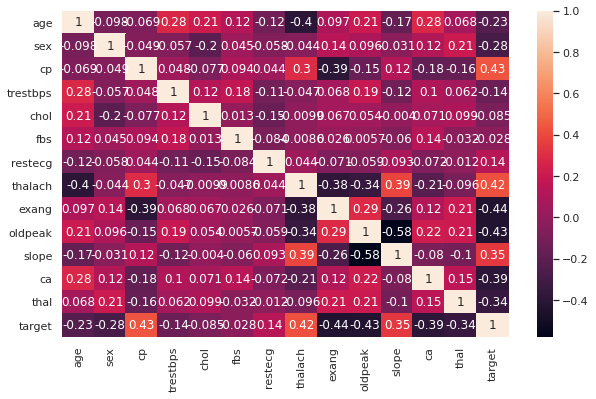

In [32]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

#  Spliting the dataset into Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ----------------**Train The Model**-----------

# KNN

In [41]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [42]:
# Train the model

In [43]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[21  6]
 [ 5 29]]


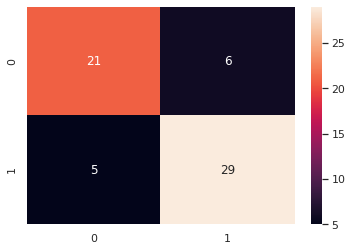

In [48]:
sn.heatmap(cm_knn, annot= True)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn)
re  = recall_score(y_test, y_pred_knn)
f1  = f1_score(y_test, y_pred_knn)

In [51]:
print("Summary of KNN")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of KNN
Accuracy    = 0.819672131147541
Precison    = 0.8285714285714286
Recall      = 0.8529411764705882
f1 score    = 0.8405797101449276


**ROC of KNN**

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [84]:
prob_all_knn = classifier_knn.predict_proba(X_test)
#print(prob_all_knn)

In [66]:
# keep probabilities for the positive outcome only
probs_knn = prob_all_knn[:, 1]

In [67]:
# calculate scores
auc_knn = roc_auc_score(y_test, probs_knn)
print('K-NN: ROC AUC=%.3f' % (auc_knn))

K-NN: ROC AUC=0.917


In [70]:
# Plot the ROC 

# calculate roc curves
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)

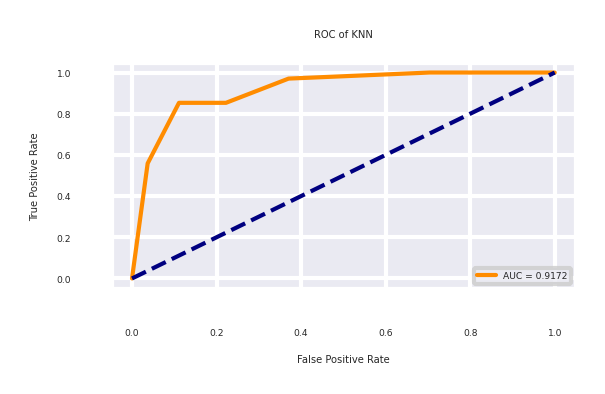

In [83]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_knn, tpr_knn,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  SVM

In [96]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf',probability=True, random_state = 0)

In [97]:
# Training the SVM
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [98]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [99]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[21  6]
 [ 2 32]]


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_svm)
pre = precision_score(y_test, y_pred_svm)
re  = recall_score(y_test, y_pred_svm)
f1  = f1_score(y_test, y_pred_svm)

In [101]:
print("Summary of SVM")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of SVM
Accuracy    = 0.8688524590163934
Precison    = 0.8421052631578947
Recall      = 0.9411764705882353
f1 score    = 0.8888888888888888


# ROC of SVM

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [103]:
prob_all_svm = classifier_svm.predict_proba(X_test)

In [110]:
# keep probabilities for the positive outcome only
probs_svm = prob_all_svm[:, 1]

In [111]:
# calculate scores
auc_svm = roc_auc_score(y_test, probs_svm)
print('SVM: ROC AUC=%.3f' % (auc_svm))

SVM: ROC AUC=0.929


In [114]:
# Plot the ROC 

# calculate roc curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_svm)

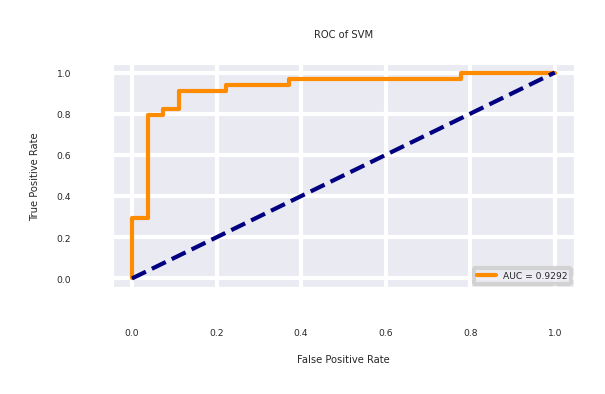

In [115]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_svm, tpr_svm,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [117]:
# Training the Decision Tree
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [118]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [119]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[22  5]
 [ 8 26]]


In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_dt)
pre = precision_score(y_test, y_pred_dt)
re  = recall_score(y_test, y_pred_dt)
f1  = f1_score(y_test, y_pred_dt)

In [121]:
print("Summary of Decision Tree")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Decision Tree
Accuracy    = 0.7868852459016393
Precison    = 0.8387096774193549
Recall      = 0.7647058823529411
f1 score    = 0.7999999999999999


# ROC of Decision Tree

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [123]:
prob_all_dt = classifier_dt.predict_proba(X_test)

In [124]:
# keep probabilities for the positive outcome only
probs_dt = prob_all_dt[:, 1]

In [125]:
# calculate scores
auc_dt = roc_auc_score(y_test, probs_dt)
print('Decision Tree: ROC AUC=%.3f' % (auc_dt))

Decision Tree: ROC AUC=0.790


In [126]:
# Plot the ROC 

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)

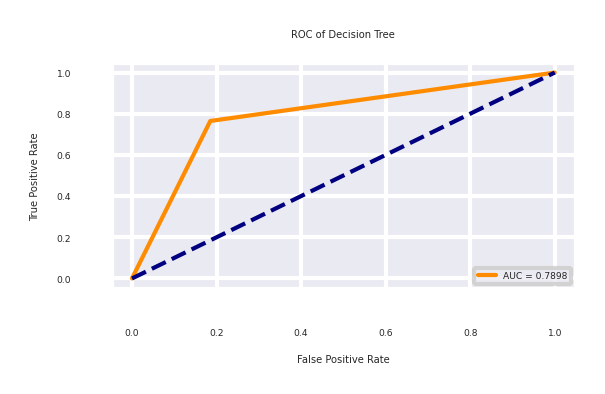

In [127]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_dt, tpr_dt,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

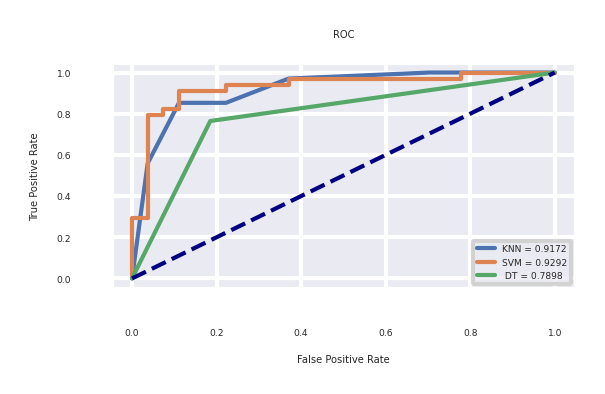

In [131]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_knn, tpr_knn,linewidth=1, label = 'KNN = %0.4f' % auc_knn)
plt.plot(fpr_svm, tpr_svm,linewidth=1, label = 'SVM = %0.4f' % auc_svm)
plt.plot(fpr_dt, tpr_dt,linewidth=1,   label =  ' DT = %0.4f' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()